In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from prettytable import PrettyTable

In [2]:
url = 'https://www.mohfw.gov.in/'
# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
# notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)
#now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,33,33,0
1,2,Andhra Pradesh,3110,1896,56
2,3,Arunachal Pradesh,2,1,0
3,4,Assam,526,62,4
4,5,Bihar,2730,749,13
5,6,Chandigarh,238,186,3
6,7,Chhattisgarh,291,72,0
7,8,Dadar Nagar Haveli,2,0,0
8,9,Delhi,14053,6771,276
9,10,Goa,67,19,0


In [7]:
state_data['Confirmed'] = state_data['Confirmed'].map(int)
#state_data['Recovered'] = state_data['Recovered'].map(int)
#state_data['Deceased'] = state_data['Deceased'].map(int)

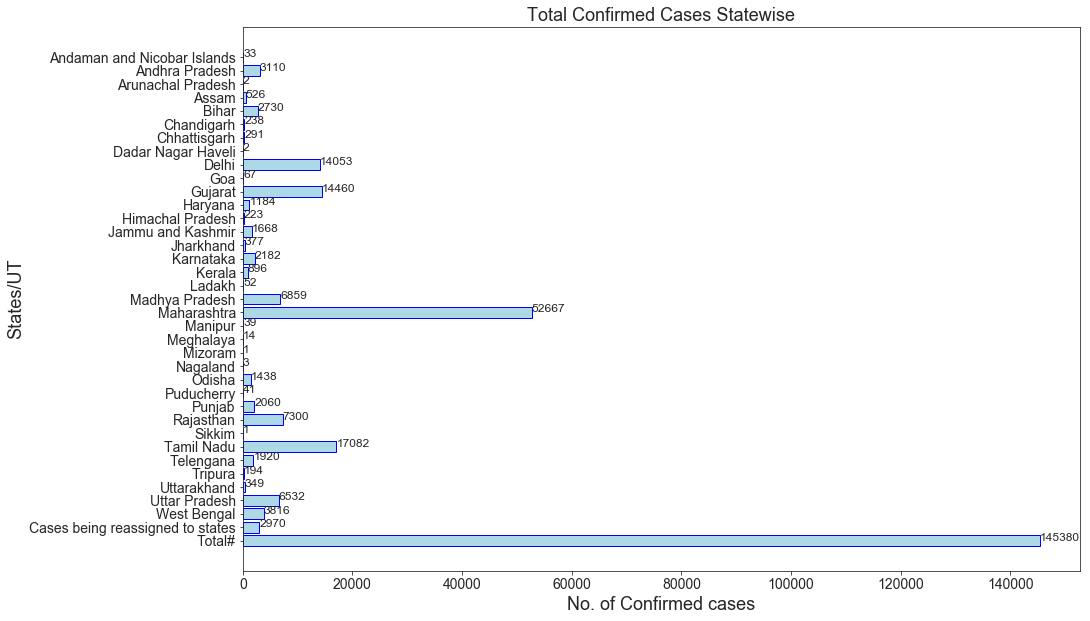

In [8]:
sns.set_style('ticks')
plt.figure(figsize = (15,10))
plt.barh(state_data['States/UT'],    state_data['Confirmed'].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 18 )
for index, value in enumerate(state_data['Confirmed']):
    plt.text(value, index, str(value), fontsize = 12)
plt.show()